In [ ]:
!pip install gluonts gluonts[torch] torch
!pip install pytorch-lightning
!pip install lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
import pandas as pd
import numpy as np

def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

In [ ]:
import os
files = os.listdir('/content')
print(files)
#path = '/train.csv'
path = '/content/drive/MyDrive/sales/train.csv'
print(path)

['.config', 'drive', 'sample_data']
/content/drive/MyDrive/sales/train.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
data = pd.read_csv(path, index_col='id', parse_dates=['date'])
print(data.head())
# data2 = data[['date', 'family', 'sales']]
data2 = data.loc[data['store_nbr'] == 1, ['date', 'family', 'sales']]
print(data2.head())

         date  store_nbr      family  sales  onpromotion
id                                                      
0  2013-01-01          1  AUTOMOTIVE    0.0            0
1  2013-01-01          1   BABY CARE    0.0            0
2  2013-01-01          1      BEAUTY    0.0            0
3  2013-01-01          1   BEVERAGES    0.0            0
4  2013-01-01          1       BOOKS    0.0            0
         date      family  sales
id                              
0  2013-01-01  AUTOMOTIVE    0.0
1  2013-01-01   BABY CARE    0.0
2  2013-01-01      BEAUTY    0.0
3  2013-01-01   BEVERAGES    0.0
4  2013-01-01       BOOKS    0.0


In [ ]:
data['date'] = pd.to_datetime(data['date'])
full_range = pd.date_range(start=data['date'].min(), end=data['date'].max())
missing_dates = full_range.difference(data['date'])

print("Missing dates:")
print(missing_dates)

Missing dates:
DatetimeIndex(['2013-12-25', '2014-12-25', '2015-12-25', '2016-12-25'], dtype='datetime64[ns]', freq=None)


In [ ]:
dec25 = list()
for year in range(2013,2017):
    for family in data['family'].unique():
        dec25 += [{'date': pd.Timestamp(f'{year}-12-25'), 'family': family, 'sales': np.nan}]
print(dec25)
data2 = pd.concat([data2, pd.DataFrame(dec25)], ignore_index=True).sort_values('date')
print(data2.head())

[{'date': Timestamp('2013-12-25 00:00:00'), 'family': 'AUTOMOTIVE', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'BABY CARE', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'BEAUTY', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'BEVERAGES', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'BOOKS', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'BREAD/BAKERY', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'CELEBRATION', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'CLEANING', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'DAIRY', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'DELI', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'EGGS', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'), 'family': 'FROZEN FOODS', 'sales': nan}, {'date': Timestamp('2013-12-25 00:00:00'

In [ ]:
# data2['date'] = pd.to_datetime(data2['date'])
train = data2.loc[data2['date'] < '2017-01-01']
print(train.head())
test = data2.loc[(data2['date'] >= '2017-01-01') & (data2['date'] < '2017-04-01')]
print(test.head())

         date                      family  sales
0  2013-01-01                  AUTOMOTIVE    0.0
32 2013-01-01                     SEAFOOD    0.0
31 2013-01-01  SCHOOL AND OFFICE SUPPLIES    0.0
30 2013-01-01                     PRODUCE    0.0
29 2013-01-01              PREPARED FOODS    0.0
            date            family  sales
48081 2017-01-01        AUTOMOTIVE    0.0
48101 2017-01-01   LAWN AND GARDEN    0.0
48102 2017-01-01          LINGERIE    0.0
48103 2017-01-01  LIQUOR,WINE,BEER    0.0
48104 2017-01-01         MAGAZINES    0.0


In [ ]:
from gluonts.dataset.pandas import PandasDataset

train_ds = PandasDataset.from_long_dataframe(train, target='sales', item_id='family',
                                       timestamp='date', freq='D')

In [ ]:
from gluonts.torch.model.deepar import DeepAREstimator

estimator = DeepAREstimator(freq='D', prediction_length=90, num_layers=3, trainer_kwargs={'accelerator': 'cuda', 'max_epochs':30})

predictor = estimator.train(train_ds, num_workers=2)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/lightning/pytorch/trainer/configuration_validator.py:70: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name  | Type        | Params | Mode  | In sizes                                                         | Out sizes   
--------------------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 39.0 K | train | [[1, 1], [

Training: |          | 0/? [00:00<?, ?it/s]

INFO: Epoch 0, global step 50: 'train_loss' reached 1.40116 (best 1.40116), saving model to '/content/lightning_logs/version_0/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 0, global step 50: 'train_loss' reached 1.40116 (best 1.40116), saving model to '/content/lightning_logs/version_0/checkpoints/epoch=0-step=50.ckpt' as top 1
INFO: Epoch 1, global step 100: 'train_loss' reached 0.49021 (best 0.49021), saving model to '/content/lightning_logs/version_0/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 1, global step 100: 'train_loss' reached 0.49021 (best 0.49021), saving model to '/content/lightning_logs/version_0/checkpoints/epoch=1-step=100.ckpt' as top 1
INFO: Epoch 2, global step 150: 'train_loss' was not in top 1
INFO:lightning.pytorch.utilities.rank_zero:Epoch 2, global step 150: 'train_loss' was not in top 1
INFO: Epoch 3, global step 200: 'train_loss' reached -0.00091 (best -0.00091), sa

In [ ]:
pred = list(predictor.predict(train_ds))

In [ ]:
all_preds = list()
for item in pred:
    family = item.item_id
    p = item.samples.mean(axis=0)
    p10 = np.percentile(item.samples, 10, axis=0)
    p90 = np.percentile(item.samples, 90, axis=0)
    dates = pd.date_range(start=item.start_date.to_timestamp(), periods=len(p), freq='D')
    family_pred = pd.DataFrame({'date': dates, 'family': family, 'pred': p, 'p10': p10, 'p90': p90})
    all_preds += [family_pred]
all_preds = pd.concat(all_preds, ignore_index=True)
all_preds = all_preds.merge(test, on=['date', 'family'], how='left')

wmape(all_preds['sales'], all_preds['pred'])

np.float64(0.16942955958239142)

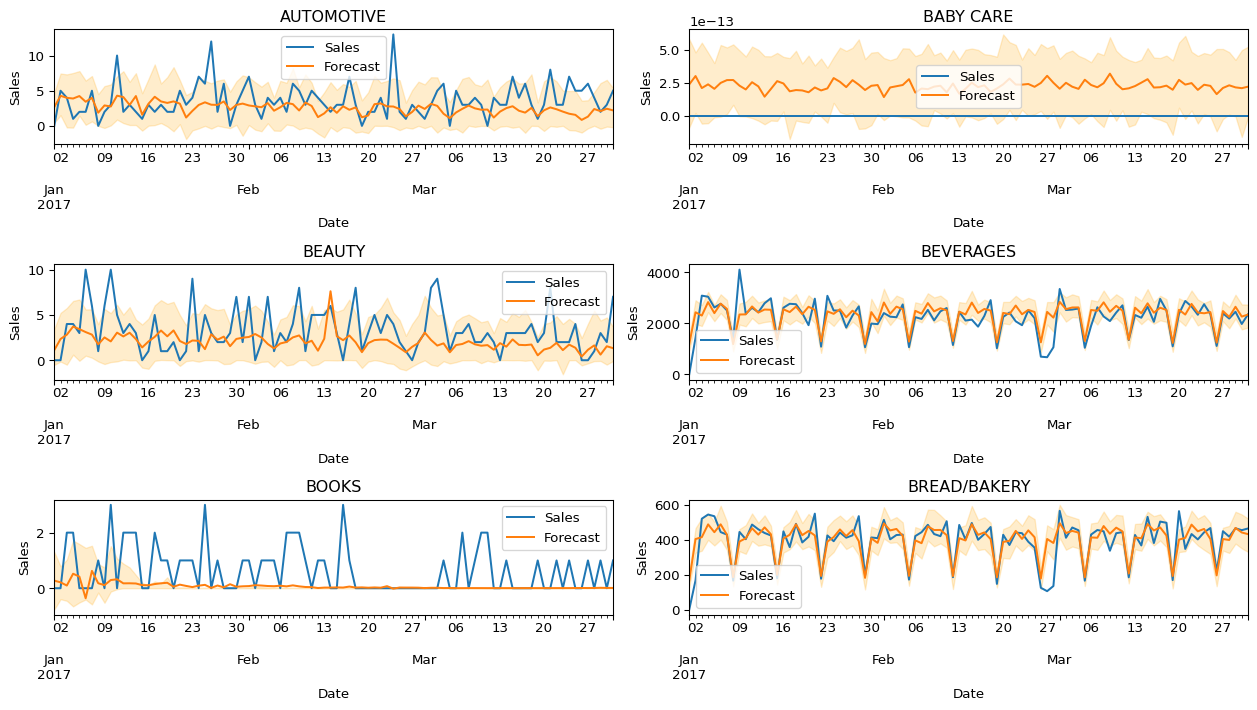

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3,2, figsize=(1280/96, 720/96), dpi=96)
ax = ax.flatten()
for ax_ ,family in enumerate(all_preds['family'].unique()[:6]):
    p_ = all_preds.loc[all_preds['family'] == family]
    p_.plot(x='date', y='sales', ax=ax[ax_], label='Sales')
    p_.plot(x='date', y='pred', ax=ax[ax_], label='Forecast')
    ax[ax_].fill_between(p_['date'].values, p_['p10'], p_['p90'], alpha=0.2, color='orange')
    ax[ax_].set_title(family)
    ax[ax_].legend()
    ax[ax_].set_xlabel('Date')
    ax[ax_].set_ylabel('Sales')
fig.tight_layout()

In [ ]:
!pip install scikit-learn

/tmp/ipython-input-14-1750849850.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_train['residual'] = xgb_train['sales'] - xgb_train['DeepAR_mean']
/tmp/ipython-input-14-1750849850.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_test['residual_pred'] = xgb.predict(xgb_test[features])
/tmp/ipython-input-14-1750849850.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

RMSE: 97.49, WMAPE: 10.24%


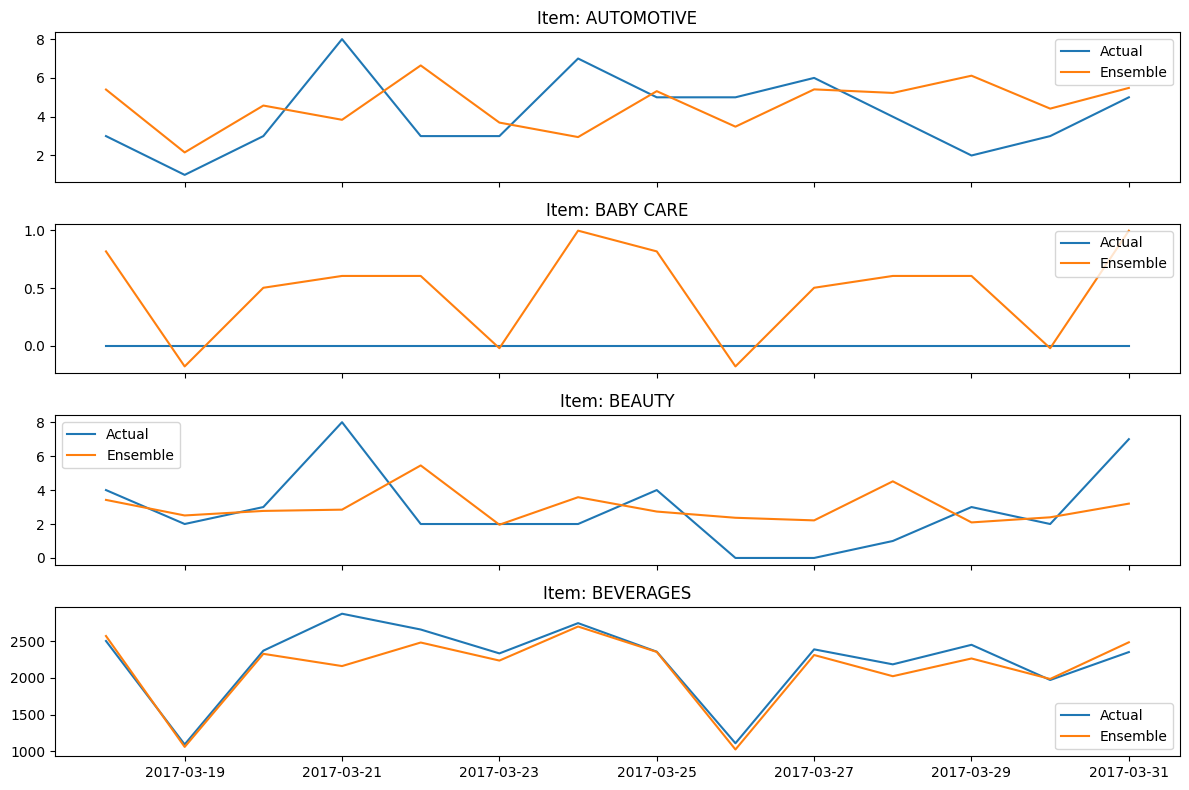

In [ ]:
# XGBoost ensemble on DeepAR predictions (Colab-safe)

# Rename for consistency
all_preds = all_preds.rename(columns={'family': 'item_id', 'pred': 'DeepAR_mean', 'p90': 'DeepAR_q90'})

# Build XGBoost dataset
xgb_data = all_preds[['item_id', 'date', 'sales', 'DeepAR_mean', 'DeepAR_q90']].copy()
xgb_data['lag_1'] = xgb_data.groupby("item_id")["sales"].shift(1)
xgb_data['lag_7'] = xgb_data.groupby("item_id")["sales"].shift(7)
xgb_data['rolling_mean_7'] = xgb_data.groupby("item_id")["sales"].shift(1).rolling(7).mean().reset_index(0, drop=True)
xgb_data['day_of_week'] = xgb_data['date'].dt.dayofweek
xgb_data['is_weekend'] = xgb_data['day_of_week'].isin([5, 6]).astype(int)
xgb_data['month'] = xgb_data['date'].dt.month

xgb_data = xgb_data.dropna()

# Train/test split
cutoff = xgb_data['date'].max() - pd.Timedelta(days=14)
xgb_train = xgb_data[xgb_data['date'] <= cutoff]
xgb_test = xgb_data[xgb_data['date'] > cutoff]

# Train XGBoost on residuals
from xgboost import XGBRegressor
features = ['DeepAR_mean', 'DeepAR_q90', 'lag_1', 'lag_7', 'rolling_mean_7', 'day_of_week', 'is_weekend', 'month']
xgb_train['residual'] = xgb_train['sales'] - xgb_train['DeepAR_mean']
xgb = XGBRegressor()
xgb.fit(xgb_train[features], xgb_train['residual'])

# Predict
xgb_test['residual_pred'] = xgb.predict(xgb_test[features])
xgb_test['final_ensemble'] = xgb_test['DeepAR_mean'] + xgb_test['residual_pred']

# Evaluation
from sklearn.metrics import mean_squared_error

def wmape(y_true, y_pred):
    return np.abs(y_true - y_pred).sum() / np.abs(y_true).sum()

rmse = np.sqrt(mean_squared_error(xgb_test['sales'], xgb_test['final_ensemble']))
w = wmape(xgb_test['sales'], xgb_test['final_ensemble'])
print(f"RMSE: {rmse:.2f}, WMAPE: {w:.2%}")

# Visualization
import matplotlib.pyplot as plt
families = xgb_test['item_id'].unique()[:4]
fig, axs = plt.subplots(len(families), 1, figsize=(12, 8), sharex=True)

for i, fam in enumerate(families):
    sub = xgb_test[xgb_test['item_id'] == fam]
    axs[i].plot(sub['date'], sub['sales'], label='Actual')
    axs[i].plot(sub['date'], sub['final_ensemble'], label='Ensemble')
    axs[i].set_title(f"Item: {fam}")
    axs[i].legend()

plt.tight_layout()
plt.show()

/tmp/ipython-input-15-3876765448.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xgb_test['p10'] = xgb_test['DeepAR_mean']  # fallback if needed


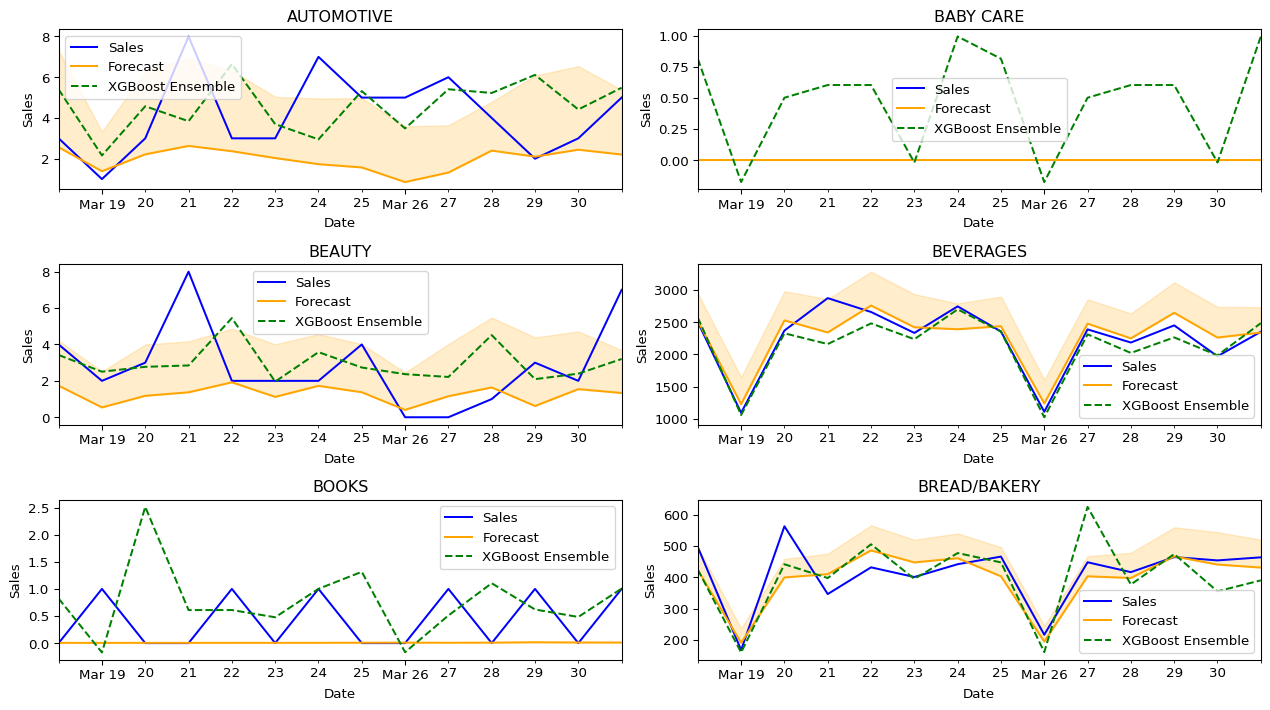

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Make sure p10 exists if you want to use it for shading
if 'p10' not in xgb_test.columns:
    xgb_test['p10'] = xgb_test['DeepAR_mean']  # fallback if needed

fig, ax = plt.subplots(3, 2, figsize=(1280/96, 720/96), dpi=96)
ax = ax.flatten()

for ax_idx, family in enumerate(xgb_test['item_id'].unique()[:6]):
    sub = xgb_test[xgb_test['item_id'] == family].copy()

    sub = sub.rename(columns={
        'sales': 'Sales',
        'DeepAR_mean': 'Forecast',
        'DeepAR_q90': 'p90',
        'final_ensemble': 'XGBoost Ensemble'
    })

    # Plot with pandas-style for legend consistency
    sub.plot(x='date', y='Sales', ax=ax[ax_idx], label='Sales', color='blue')
    sub.plot(x='date', y='Forecast', ax=ax[ax_idx], label='Forecast', color='orange')
    sub.plot(x='date', y='XGBoost Ensemble', ax=ax[ax_idx], label='XGBoost Ensemble', linestyle='--', color='green')

    # Optional confidence interval
    if 'p90' in sub.columns and 'p10' in sub.columns:
      x = sub['date'].values
      y1 = sub['p10'].astype(np.float64).values
      y2 = sub['p90'].astype(np.float64).values
      ax[ax_idx].fill_between(x, y1, y2, alpha=0.2, color='orange')

    ax[ax_idx].set_title(family)
    ax[ax_idx].legend()
    ax[ax_idx].set_xlabel('Date')
    ax[ax_idx].set_ylabel('Sales')

    # Match the date formatting style in your image
    ax[ax_idx].xaxis.set_major_locator(mdates.DayLocator(interval=7))
    ax[ax_idx].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[ax_idx].tick_params(axis='x', rotation=0)

fig.tight_layout()
plt.show()
